# Creative tools for QISKit

In [1]:
import creative

Some basic examples of how the creative tools can be used.

## `ladder`

A single qubit cannot store more than one bit of information. But if we are happy to run our program many times and do some statistics, one repeatedly used qubit can store more information. The ladder class does just this, by encoding an `int` like object into a qubit.

These quantum integers run from a minimum value of `0` to a maximum of `d`, which is the input we must supply when initializing a `ladder` object. Let's go for `d=3` in our first example.

In [2]:
A = creative.ladder(3)

The initial value for a `ladder` object is always `0`.

In [3]:
a = A.value()
print('    Initial value =',a)

    Initial value = 0


We can add to this to get other numbers.

In [4]:
A.add(1)
print('    Add 1  --->  value =',A.value())

    Add 1  --->  value = 1


In [5]:
A.add(2)
print('    Add 2  --->  value =',A.value())

    Add 2  --->  value = 3


Once the maximum value has been reached, the `add()` method will instead start substracting. This is the inspiration behind the 'ladder' name: once you've reached the top, there's nowhere to climb but back down again.

In [6]:
for example in range(9):
    A.add(1)
    print('    Add 1  --->  value =',A.value())

    Add 1  --->  value = 2
    Add 1  --->  value = 1
    Add 1  --->  value = 0
    Add 1  --->  value = 1
    Add 1  --->  value = 2
    Add 1  --->  value = 3
    Add 1  --->  value = 2
    Add 1  --->  value = 1
    Add 1  --->  value = 0


Since we are doing statistics in order to squeeze an `int` like object into a qubit, the behaviour can sometimes be erratic. This becomes ever more true for larger values of `d`.

The erratic behaviour is also dependent on the kwargs for the `value()` method. These are `shots=1024`, which sets the number times the process is repeated to calculate probabilities; and `backend='local_qasm_simulator'`, which can be changed to run on a real device such as `'ibmqx4'`. The more statistical noise you have from a low value of `shots` (which should be around 1000 times greater than `d`), and the more quantum noise you have from a real device, the more strange behaviour you will see.

In the example below, shots is only 5 times `d`.

In [7]:
A = creative.ladder(10)
shots = 50
for example in range(20):
    print('    Add 1  --->  value =',A.value(shots=shots))
    A.add(1)
    

    Add 1  --->  value = 0
    Add 1  --->  value = 0
    Add 1  --->  value = 2
    Add 1  --->  value = 3
    Add 1  --->  value = 4
    Add 1  --->  value = 4
    Add 1  --->  value = 6
    Add 1  --->  value = 7
    Add 1  --->  value = 8
    Add 1  --->  value = 9
    Add 1  --->  value = 10
    Add 1  --->  value = 9
    Add 1  --->  value = 8
    Add 1  --->  value = 7
    Add 1  --->  value = 6
    Add 1  --->  value = 5
    Add 1  --->  value = 4
    Add 1  --->  value = 3
    Add 1  --->  value = 1
    Add 1  --->  value = 2


The `ladder` object was inspired by the way attacks are implemented in the game [Battleships with partial NOT gates](https://medium.com/qiskit/how-to-program-a-quantum-computer-982a9329ed02). In this, each player has three ships that take up a single position. One of them needs only one hit to be destroyed, one needs two hits and the other needs three. These can be implemented with `ladder` objects with `d=1`, `d=2` and `d=3`, respectively.

In [8]:
ship = [None]*3
ship[0] = creative.ladder(1)
ship[1] = creative.ladder(2)
ship[2] = creative.ladder(3)

Attacking a ship is then done by with `add(1)`, and a ship is declared destroyed once its value of `d` has been reached.

*Note: The following cell is interactive so you'll need to run it yourself*

In [ ]:
destroyed = 0
while destroyed<3:
    attack = int(input('\n    > Choose a ship to attack (0,1 or 2)...\n    '))
    ship[attack].add(1)
    destroyed = 0
    for j in range(3):
        if ship[j].value()==ship[j].d:
            print('\n    *Ship',j,'has been destroyed!*')
            destroyed += 1
print('\n    **Mission complete!**')

Of course, the ships are also hidden in a real game of Battleships. The above is just to give a taste.

## `twobit`

A qubit is the quantum version of a bit. So you can use it to store boolean values. That's basically what a `twobit` object does.

In [9]:
b = creative.twobit()

We can prepare our bit with the value `True`

In [10]:
b.prepare({'Z':True})
print("    bit value =",b.value('Z') )

    bit value = True


Or with the value `False`

In [11]:
b.prepare({'Z':False})
print("    bit value =",b.value('Z') )

    bit value = False


You probably notice the `'Z'` in all the lines above. This is because, though you can only store one bit in a single qubit, there are many ways to do it. So when preparing the bit, and when reading out the value, you need to specify what method is used. In the above, we used what is known as the `Z` basis.

The `twobit` object also supports the use of the so-called `X` basis.

In [12]:
b.prepare({'X':True})
print("    bit value =",b.value('X') )

    bit value = True


In [13]:
b.prepare({'X':False})
print("    bit value =",b.value('X') )

    bit value = False


These two methods are completely incompatible. If you encode using the `Z` basis and read out using the `X` (or vice-versa) you'll get a random result.

In [14]:
print("    When True is encoded with Z, the value read out with X is:\n")
for trial in range(1,11):
    message = "        Try " + str(trial)+": "
    message += str( b.value('X') ) 
    print( message )

    When True is encoded with Z, the value read out with X is:

        Try 1: False
        Try 2: False
        Try 3: False
        Try 4: False
        Try 5: False
        Try 6: False
        Try 7: False
        Try 8: False
        Try 9: False
        Try 10: False


Once you read a value out for a given basis, the qubit forgets anything that was encoded within it before the readout. So though encoding with `Z` and then reading out with `X` gives a random value, that value will remain if you read out using `X` again.

In [15]:
print("    When True is encoded with Z, repeatedly reading out with with X gives the values:\n")
for trial in range(1,11):
    message = "        Try " + str(trial)+": "
    b.prepare({'Z':True})
    for repeat in range(5):
        message += str( b.value('X') ) + ", "
    print(message)

    When True is encoded with Z, repeatedly reading out with with X gives the values:

        Try 1: False, False, False, False, False, 
        Try 2: True, True, True, True, True, 
        Try 3: True, True, True, True, True, 
        Try 4: True, True, True, True, True, 
        Try 5: False, False, False, False, False, 
        Try 6: False, False, False, False, False, 
        Try 7: True, True, True, True, True, 
        Try 8: False, False, False, False, False, 
        Try 9: True, True, True, True, True, 
        Try 10: True, True, True, True, True, 


In the game [Battleships with complementary measurements](https://medium.com/@decodoku/how-to-program-a-quantum-computer-part-2-f0d3eee872fe), this is used to implement the attacks that can be made on ships. There are two kinds of attack, with correspond calling `value()` with either `Z` or `X`.

A ship is destroyed when the result is `True`. If `False`, the ship survives the attack. It also becomes immune to it, since another identical call to `value()` will give the same result. Sof for any hope of succes, the other type of attack must be used. If the ship again survives, it will have forgotten its immunity to the previous attack type. So switching between attacks will ensure victory in the end.

*Note: The following cell is interactive so you'll need to run it yourself*

In [ ]:
ship = creative.twobit()

destroyed = False
while not destroyed:
    basis = input('\n    > Choose a torpedo type (Z or X)...\n    ')
    destroyed = ship.value(basis)
    if destroyed:
        print('\n    *Ship destroyed!*')
    else:
        print('\n    *Attack failed!*')
print('\n    **Mission complete!**')

Note that the `prepare()` method was never called above. This resulting in the first use of `value()` giving a random outcome, regardless of whether `X` or `Z` as used.

The `value()` method has a `backend='local_qasm_simulator'` kwarg, which can be changed to run on a real device such as `'ibmqx4'`. The noise in real devices could lead to `value()` returning the wrong value with small probability. Some mitigation is done to make this less likely. This can be turned off by setting the `mitigate=True` qwarg to `False`. The remaning kwarg is `shots=1024`, which essentially does nothing for simulated noiseless runs. For real devices (or simulated noise) large values of `shots` (such as 1024) allow the mitigation to work better than for smaller values. At the extreme of `shots=1`, the mitigation becomes powerless.

## `bell_correlation`

The `bell_correlation` function creates and measures entangled states in the way required to demontsrate a violation of [Bell's inequality](https://en.wikipedia.org/wiki/Bell%27s_theorem). But since this function was created as a tool for creative purposes, let's instead explain how it was used in the game [Quantum Battleships](https://medium.com/@decodoku/quantum-battleships-the-first-multiplayer-game-for-a-quantum-computer-e4d600ccb3f3).

In this, each ship is made out of two qubits. To see whether or not the ship has sunk, we measure the qubits (which means extracting a bit value from each). By repeating this many times, we can see how likely these two outputs are to agree. If the are most likely to agree, we think of the ship as intact. If they are most likely to disagree, we think of it as destroyed.

Measurements can be done in many ways, which will lead to different results. Initially, we use a measurement type called `Z` on both qubits.

To see what the probability of agreement is, we use the The `bell_correlation` function. This takes a two character string as its argument, which specifies the measurement type for the two qubits. For a `Z` type measurement on both, this is `'ZZ'`.

In [16]:
P = creative.bell_correlation('ZZ')
print('    Probability of agreement =',P)

    Probability of agreement = 0.8564453125


The outputs are most likely to agree, so our ship is intact!

Now suppose our opponent launches an attack on our ship and hits the first qubit. We implement this by changing the measurement type to `X` for this qubit.

In [17]:
P = creative.bell_correlation('XZ')
print('    Probability of agreement =',P)

    Probability of agreement = 0.8583984375


Our ship survived this single attack. It would also have survived if the attack was on the other qubit instead.

In [18]:
P = creative.bell_correlation('ZX')
print('    Probability of agreement =',P)

    Probability of agreement = 0.8525390625


But once both qubits are attacked, and so both have an `X` type measurement, it is a different story.

In [19]:
P = creative.bell_correlation('XX')
print('    Probability of agreement =',P)

    Probability of agreement = 0.1259765625


The results now most likely disagree. The connection between the two parts of the ship has been disrupted. It has been destroyed!

From a game design perspective, the specific numbers we get here might seem a bit arbitrary. But from a quantum perspective, they are extremely important. They prove that quantum variables are fundamentally different from classical ones. For more information, see [this article](https://medium.com/qiskit/why-variables-in-quantum-computers-can-be-a-little-spooky-cc5eb226f772).

The kwargs for this function are: `shots=1024`, which sets the number times the process is repeated to calculate probabilities; and `backend='local_qasm_simulator'`, which can be changed to run on a real device such as `'ibmqx4'`.

## The superposers

### `bitstring_superposer`

Information can be represented as bit strings. These can then be encoded into qubits: simply use one qubit for each bit in the string and set its value to `0` or `1` as required.

With qubits, we can also create superpositions of bit strings, which is exactly what is done by this function. It takes list of two bit strings as an argument, and then encodes and superposes them.

In [20]:
stats = creative.bitstring_superposer(['0000','0101'],shots=1)

/Users/james/anaconda/lib/python3.6/site-packages/qiskit/backends/local/qasm_simulator_cpp.py:89: DeprecationWarning: The behavior of getting statevector from simulators by setting shots=1 is deprecated and will be removed. Use the local_statevector_simulator instead, or place explicit snapshot instructions.
  DeprecationWarning)


When the superposition of bit strings is measured, the result will be randomly chosen from the strings being superposed.

In [21]:
print("    Random string from superposition: ",list(stats.keys())[0])

    Random string from superposition:  0101


To see what the probabilities are for each outcome, we can repeat the process many times and caculate the fraction of runs for which each result occurs. For this we can set a high value for the shots kwarg, or just use its default value of shots=1024.

In [22]:
stats = creative.bitstring_superposer(['0000','0101'])
print("    Strings and their fractions:       ",stats)

    Strings and their fractions:        {'0000': 0.5283203125, '0101': 0.4716796875}


This dictionary of measurement results isn't the most exciting thing in the world. The next few functions use `bitstring_superposer` to make things that are more appealing.

### emoticon_superposer

Thanks to the ASCII standard, we have a well defined way of assigning bit strings to letters, numbers and punctuation. For example, you can express `;)` as `0011101100101001`, if you were so inclined.

Given two strings of letters, numbers and punctuation, the `emoticon_superposer` creates and analysis the superposition, and visualizes the results. Note that only strings of length 2 are supported (so you can do `:D` but not `:-D`).

For example, let's superpose `;)` and `8)`.

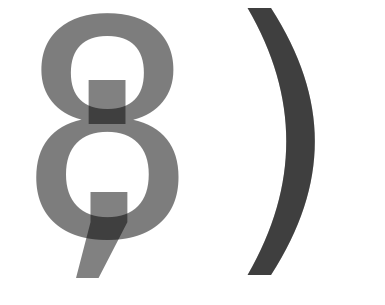

In [23]:
stats = creative.emoticon_superposer([';)','8)'])

The fractions of runs for which each emoticon occured is also output, in case you want it for some reason.

In [24]:
print("    Emoticons and their fractions:       ",stats)

    Emoticons and their fractions:        {'8)': 0.5068359375, ';)': 0.4931640625}


The image is composed of all the emoticons found in the results, with the alpha channel of each set such that the emoticons for the most probable strings appear the strongest.

The `backend='local_qasm_simulator'` and `shots=1024` are present. To use a real device, you'll need one with at least 16 qubits, so use `'ibmqx5'`. Noise will mean that spurious results will appear on some runs, resulting in spurious emoticons appearing in the final image.

stats = creative.emoticon_superposer([':)','8D'],backend='ibmqx5')

This function was inspired by a superposition of emoticons made as a kind of quantum 'Hello World'. For more on this, see [here](https://medium.com/qiskit/making-a-quantum-computer-smile-cee86a6fc1de).

### `image_superposer`

The `image_superposer` function does much the same as the `emoticon_superposer`, but using more general images. There are two main arguments, each of which should contain a list of filenames for png files in the local images folder. The first describes a set of images from which the superposed images will be chosen. With this we define a binary encoding for the set of images, assigning a unique binary string to each.

The second specifies the images to be superposed. This should either contain exactly two filenames, or it contain all the filenames within the first list. This is because only two types of superposition are currently supported: those of two images, or those of all images within a set.

When the `backend='local_qasm_simulator'` kwarg is changed to a real device, noise will result the appearence of other images than those involved in the superposition. These will be from the larger set specified from the first list. The `shots=1024` is also present, doing its usual thing.

creative.image_superposer(['butterfly','moth','heron'],['butterfly','moth'],backend='ibmqx4')

This function was inspired by part of the command line version of the [Hello Quantum](http://helloquantum.mybluemix.net/) project. You can read more about that image superposer [here](https://medium.com/qiskit/a-quantum-superposition-of-a-tiger-and-a-bear-b461e3b23908).

## `layout`

In the current era of quantum computing, we often have to take into account the details of a device when creating our projects. The `layout` class has some tools do help us do this.

To create a layout object, we need to supply the device that the object is going to be based on. For this you can use a string specifying an IBM device (`'ibmqx2'`, `'ibmqx4'` or `'ibmqx5'`). You can also supply a list of the form `[Lx,Ly]`, which creates a device based on an `Lx` $\times$ `Ly` square lattice.

In this example, we'll use `'ibmqx5'`.

In [25]:
L = creative.layout('ibmqx5')

With this we can ask for the number of qubits on the device

In [26]:
L.num

16

We can also get the pairs of qubits for which a controlled gate can be directly implemented.

In [27]:
L.pairs

{'A': [1, 0],
 'B': [1, 2],
 'C': [2, 3],
 'D': [3, 4],
 'E': [3, 14],
 'F': [5, 4],
 'G': [6, 5],
 'H': [6, 7],
 'I': [6, 11],
 'J': [7, 10],
 'K': [8, 7],
 'L': [9, 8],
 'M': [9, 10],
 'N': [11, 10],
 'O': [12, 5],
 'P': [12, 11],
 'Q': [12, 13],
 'R': [13, 4],
 'S': [13, 14],
 'T': [15, 0],
 'U': [15, 2],
 'V': [15, 14]}

For real devices, these pairs are taken from `backend.configuration` in QISKit. However, the names for the pairs are defined here to serve as a useful shorthand when referring to them.

Also defined here are a set of positions for the qubits, which can be used to create an image of the device.

In [28]:
L.pos

{0: [0, 0],
 1: [0, 1],
 2: [1, 1],
 3: [2, 1],
 4: [3, 1],
 5: [4, 1],
 6: [5, 1],
 7: [6, 1],
 8: [7, 1],
 9: [7, 0],
 10: [6, 0],
 11: [5, 0],
 12: [4, 0],
 13: [3, 0],
 14: [2, 0],
 15: [1, 0],
 'A': [0.0, 0.5],
 'B': [0.5, 1.0],
 'C': [1.5, 1.0],
 'D': [2.5, 1.0],
 'E': [2.0, 0.5],
 'F': [3.5, 1.0],
 'G': [4.5, 1.0],
 'H': [5.5, 1.0],
 'I': [5.0, 0.5],
 'J': [6.0, 0.5],
 'K': [6.5, 1.0],
 'L': [7.0, 0.5],
 'M': [6.5, 0.0],
 'N': [5.5, 0.0],
 'O': [4.0, 0.5],
 'P': [4.5, 0.0],
 'Q': [3.5, 0.0],
 'R': [3.0, 0.5],
 'S': [2.5, 0.0],
 'T': [0.5, 0.0],
 'U': [1.0, 0.5],
 'V': [1.5, 0.0]}

The entries in this dict with an integer key give the coordinates for the corresponding qubit.

As a bit of bonus information, there are also positions with pair names as keys. This give the position at the midpoint between the two qubits in each pair.

By calling the `plot` method, we can turn this into an image.

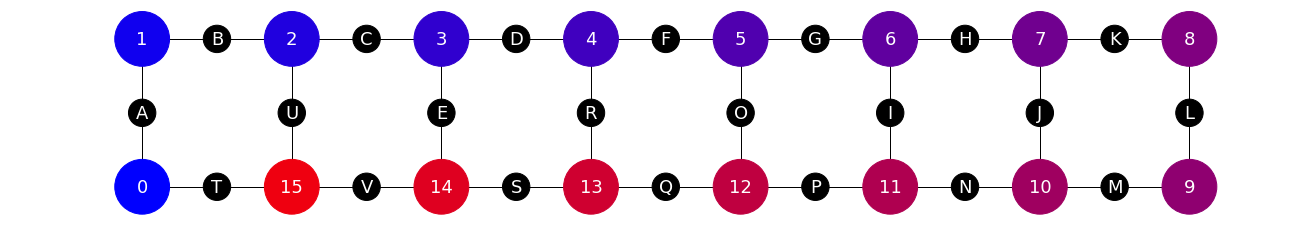

In [29]:
L.plot()

A call to `plot` with no arguments, as above, has a coloured dot to represent each qubit and a small black one for each pair. These are labelled with the qubit number and pair name, respectively. A colour gradient is used that depends on the qubit number.

The `plot` method also has kwargs that can be used for different colours, labels and sizes. In fact, there are the kwargs `colors`, `labels` and `sizes`. Just supply a dictionary for each of these that has qubit numbers and pair names as keys (i.e. the same keys as `pos`), and the correponding colour (as an rgb tuple or string), label (as a string) or size (as an int or float) as values.

Here's a random example

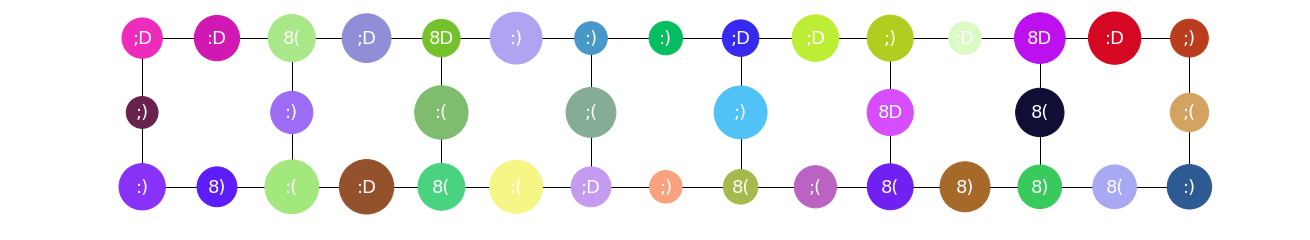

In [30]:
colors = {}
labels = {}
sizes = {}
import random
for node in L.pos:
    colors[node] = (random.random(),random.random(),random.random())
    labels[node] = random.choice([';',':','8']) + random.choice([')','(','D'])
    sizes[node] = 1000+2000*(random.random())
    
L.plot(colors=colors,labels=labels,sizes=sizes)

You can also use it to plot a representation of the output of a program. For example, lets get the statistics for a superposition of bit strings.

In [31]:
stats = creative.bitstring_superposer(['1100011001111100','0110010101011001'])
print(stats)

{'1100011001111100': 0.5029296875, '0110010101011001': 0.4970703125}


We can then pass this to the `calculate_probs` method of this class, which will determine the probability that each qubit has an output of `1`, and the probability that each pair has an output that is different.

In [32]:
probs = L.calculate_probs(stats)
print(probs)

{0: 0.4970703125, 1: 0, 2: 0.5029296875, 3: 1.0, 4: 1.0, 5: 0.5029296875, 6: 1.0, 7: 0, 8: 0.4970703125, 9: 0.5029296875, 10: 1.0, 11: 0, 12: 0, 13: 0.4970703125, 14: 1.0, 15: 0.5029296875, 'A': 0.4970703125, 'B': 0.5029296875, 'C': 0.4970703125, 'D': 0, 'E': 0, 'F': 0.4970703125, 'G': 0.4970703125, 'H': 1.0, 'I': 1.0, 'J': 1.0, 'K': 0.4970703125, 'L': 1.0, 'M': 0.4970703125, 'N': 1.0, 'O': 0.5029296875, 'P': 0, 'Q': 0.4970703125, 'R': 0.5029296875, 'S': 0.5029296875, 'T': 1.0, 'U': 0, 'V': 0.4970703125}


The `plot` method then has a `probs` kwarg that can take the output from this. The percentage probabilities are displayed for each qubit and pair, with a gradient colour between red (for 0%) and blue (for 100%).

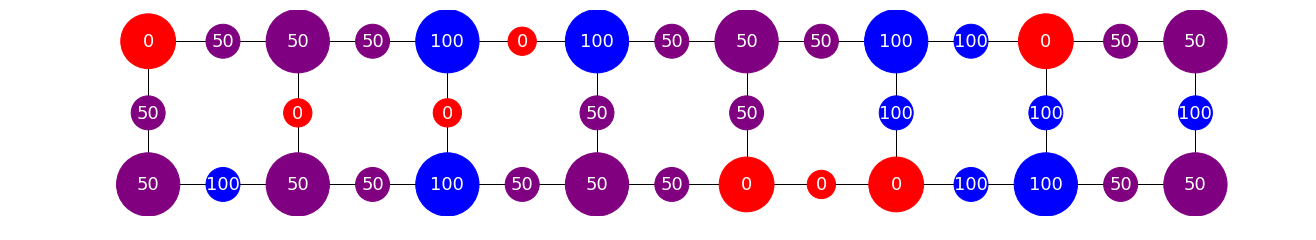

In [33]:
L.plot(probs=probs)

Any additional information supplied to `colors`, `labels` and `sizes` will overwrite the values created from `stats`. For example, we can change the colour for qubit 0.

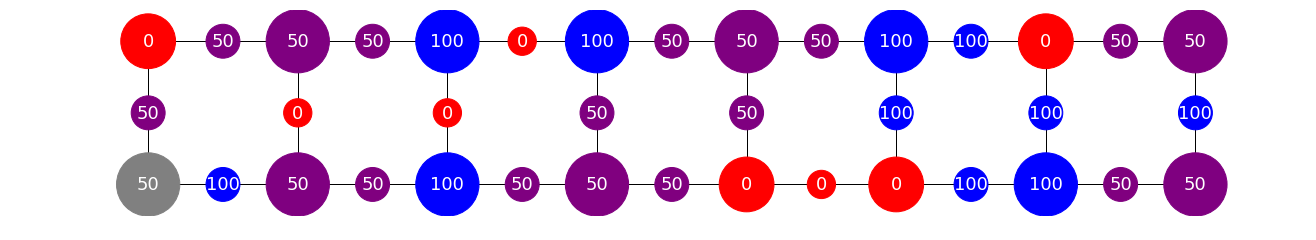

In [34]:
L.plot(probs=probs,colors={0:(0.5,0.5,0.5)})

The project that inspired this tool is [Quantum Awesomeness](https://github.com/decodoku/A_Game_to_Benchmark_Quantum_Computers/blob/master/README.md), so let's set up a quick Quantum Awesomeness puzzle...

In [35]:
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, execute
import numpy as np
qr = QuantumRegister(16)
cr = ClassicalRegister(16)
qc = QuantumCircuit(qr, cr)
correct_pairs = ['B','T','E','F','Q','H','N','L']
for pair in correct_pairs:
    qc.rx(random.random()*np.pi,qr[L.pairs[pair][0]])
    qc.cx(qr[L.pairs[pair][0]],qr[L.pairs[pair][1]])
qc.measure(qr,cr)
job = execute(qc,'local_qasm_simulator')
stats = job.result().get_counts()

...and then run it using the `layout` object.

*Note: The following cell is interactive so you'll need to run it yourself*

In [ ]:
probs = L.calculate_probs(stats) 

pair_labels = {}
for node in L.pos:
    if type(node)==str:
        pair_labels[node] = node

chosen_pairs = []
colors = {}
while len(chosen_pairs)<8:
    L.plot(probs=probs,labels=pair_labels,colors=colors)
    pair = str.upper(input("    > Type the name of a pair of qubits whose numbers are the same (or very similar)...\n"))
    chosen_pairs.append( pair )
    colors[pair] = (0.5,0.5,0.5)
    for j in range(2):
        colors[L.pairs[pair][j]] = (0.5,0.5,0.5)

L.plot(probs=probs,labels=pair_labels,colors=colors)
if set(chosen_pairs)==set(correct_pairs):
    print("\n    **You got all the correct pairs! :) **\n")
else:
    print("\n    **You didn't get all the correct pairs! :( **\n")